<a href="https://colab.research.google.com/github/agusputrawan/bike-share-analysis/blob/main/bike_sharing_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putu Agus Putrawan
- **Email:** gustrapoliteknik@gmail.com
- **ID Dicoding:** gustra

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana suhu memengaruhi jumlah penyewaan sepeda sepanjang hari?
- Pertanyaan 2 : Apa dampak variasi musiman terhadap jumlah penyewaan sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [205]:
day_df = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [206]:
hours_df = pd.read_csv("/content/drive/MyDrive/Proyek_Analisis_Data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Informasi Dataset
- instant: indeks record
- dteday: tanggal
- season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 sampai 12)
- hr: jam (0 sampai 23, hanya di hours.csv)
- holiday: hari libur(0: tidak, 1: ya)
- weekday: hari dalam minggu (0: Minggu, 1: Senin, ..., 6: Sabtu)
- workingday: Apabila hari tersebut bukan akhir pekan atau hari libur, bernilai 1; jika tidak, bernilai 0.
- weathersit:
  - 1: Cerah, Beberapa awan, Sebagian besar awan
  - 2: Kabut + Awan, Kabut + Awan terputus, Kabut + Beberapa awan
  - 3: Salju ringan, Hujan ringan + Petir + Awan terputus, Hujan ringan + Awan terputus
  - 4: Hujan deras + Ice Pallet + Petir + Kabut, Salju + Kabut
- temp: Suhu yang dikonversi dalam Celsius, dihitung dengan \((t - t_{min})/(t_{max} - t_{min})\), dengan \(t_{min} = -8\) dan \(t_{max} = +39\).
- atemp: Suhu yang dirasakan yang dinormalisasi dalam Celsius, dihitung dengan \((t - t_{min})/(t_{max} - t_{min})\), dengan \(t_{min} = -16\) dan \(t_{max} = +50\).
- hum: Kelembaban yang dikonversi, dibagi dengan 100 (maksimum)
- windspeed: Kecepatan angin yang dikonversi, dibagi dengan 67 (maksimum)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda sewa, termasuk pengguna kasual dan terdaftar


### Assessing Data

In [207]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [208]:
print('Jumlah data yang hilang pada day_df: ', day_df.isnull().sum())


Jumlah data yang hilang pada day_df:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [209]:
print('Jumlah data day_df terduplikat: ', day_df.duplicated().sum())
day_df.describe()

Jumlah data day_df terduplikat:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [210]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [211]:
print('Jumlah data yang hilang pada hours_df: ', hours_df.isnull().sum())

Jumlah data yang hilang pada hours_df:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [212]:
print('Jumlah data hours_df terduplikat: ', hours_df.duplicated().sum())
hours_df.describe()

Jumlah data hours_df terduplikat:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Status Dataset

Setelah melakukan pemeriksaan pada dataset `day.csv` dan `hours.csv`, berikut adalah hasilnya:

- **day.csv**:
  - Tidak ada duplikasi: Semua baris dalam `day.csv` unik.
  - Tidak ada nilai yang hilang: Setiap kolom memiliki nilai yang lengkap.

- **hours.csv**:
  - Tidak ada duplikasi: Semua baris dalam `hours.csv` unik.
  - Tidak ada nilai yang hilang: Setiap kolom memiliki nilai yang lengkap.

Dengan demikian, data dalam kedua file CSV siap digunakan untuk analisis lebih lanjut.



### Cleaning Data

Dataframe dari Day

Menghapus kolom "holiday" karena sudah terdapat pada kolom "workingday"

In [213]:
day_df.drop(['holiday'], axis=1, inplace=True)

Merubah Nama Kolom yang masih ingin disesuaikan


In [214]:
day_df.rename(columns={'dteday':'tanggal', 'season':'musim', 'yr':'tahun', 'mnth':'bulan', 'weekday':'hari','workingday': 'hari_kerja', 'weathersit':'cuaca',
                    'temp':'temperatur', 'atemp':'temperatur_feel', 'hum':'kelembaban', 'windspeed': 'kecepatan_angin', 'casual':'user_kasual',
                    'registered':'user_terdaftar', 'cnt':'user_total'}, inplace=True)

Merubah tipe data tanggal menjadi datetime

In [215]:
datetime_columns = ['tanggal']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [216]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   musim            731 non-null    int64         
 3   tahun            731 non-null    int64         
 4   bulan            731 non-null    int64         
 5   hari             731 non-null    int64         
 6   hari_kerja       731 non-null    int64         
 7   cuaca            731 non-null    int64         
 8   temperatur       731 non-null    float64       
 9   temperatur_feel  731 non-null    float64       
 10  kelembaban       731 non-null    float64       
 11  kecepatan_angin  731 non-null    float64       
 12  user_kasual      731 non-null    int64         
 13  user_terdaftar   731 non-null    int64         
 14  user_total       731 non-null    int64    

Merubah Musim

1.   Semi
2.   Panas
3.   Gugur
4.   Dingin

In [217]:
def change_season(x):
    if x == 1:
        return 'Semi'
    elif x == 2:
        return 'Panas'
    elif x == 3:
        return 'Gugur'
    else:
        return 'Dingin'

day_df['musim'] = day_df['musim'].apply(change_season)
day_df.head()

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah tahun

1.   Jika 0 maka Tahun 2011
2.   Jika 1 maka Tahun 2012



In [218]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day_df['tahun'] = day_df['tahun'].apply(change_year)
day_df.head()

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah urutan dan penamamaan bulan

In [219]:
day_df['bulan'] = day_df['bulan'].astype('int64')
month_change = {1: 'januari', 2: 'februari', 3: 'maret', 4:'april', 5:'mei', 6:'juni', 7:'juli',
                8:'agustus', 9:'september', 10:'oktober', 11:'november', 12:'desember'}

day_df['bulan'] = day_df['bulan'].map(month_change)
day_df.head()

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,januari,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,januari,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,januari,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,januari,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah penamaan hari

In [220]:
day_change = {0: 'senin', 1: 'selasa', 2: 'rabu', 3: 'kamis', 4:'jumat', 5:'sabtu', 6:'minggu'}

day_df['hari'] = day_df['hari'].map(day_change)
day_df.head()

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,minggu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,januari,senin,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,januari,selasa,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,januari,rabu,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,januari,kamis,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah format kolom "hari_kerja" menjadi:


1.   0 menjadi Weekend/Libur
2.   1 menjadi Hari_Kerja



In [221]:
def change_workingday(x):
    if x == 0:
        return 'akhir pekan/libur'
    else:
        return 'hari kerja'

day_df['hari_kerja'] = day_df['hari_kerja'].apply(change_workingday)
day_df.head()

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,minggu,akhir pekan/libur,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,januari,senin,akhir pekan/libur,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,januari,selasa,hari kerja,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,januari,rabu,hari kerja,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,januari,kamis,hari kerja,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Merubah format dari cuaca

1.   cerah adalah 1
2.   kabut adalah 2
3.   salju ringan adalah 3
4.   hujan deras adalah 4



In [222]:
def change_weather(x):
    if x == 1:
        return 'cerah'
    elif x == 2:
        return 'kabut'
    elif x == 3:
        return 'salju ringan'
    else:
        return 'hujan deras'

day_df['cuaca'] = day_df['cuaca'].apply(change_weather)
day_df.head()


,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,minggu,akhir pekan/libur,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,januari,senin,akhir pekan/libur,kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,januari,selasa,hari kerja,cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,januari,rabu,hari kerja,cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,januari,kamis,hari kerja,cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data frame dari hours.csv

Menghapus kolom "holiday" karena sudah terdapat pada kolom "workingday"

In [223]:
hours_df.drop(['holiday'], axis=1, inplace=True)

Merubah Nama Kolom yang masih ingin disesuaikan

In [224]:
hours_df.rename(columns={'dteday':'tanggal', 'season':'musim', 'yr':'tahun', 'mnth':'bulan', 'hr': 'jam', 'weekday':'hari','workingday': 'hari_kerja', 'weathersit':'cuaca',
                    'temp':'temperatur', 'atemp':'temperatur_feel', 'hum':'kelembaban', 'windspeed': 'kecepatan_angin', 'casual':'user_kasual',
                    'registered':'user_terdaftar', 'cnt':'user_total'}, inplace=True)

Merubah tipe data tanggal menjadi datetime

In [225]:
datetime_columns = ['tanggal']

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [226]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          17379 non-null  int64         
 1   tanggal          17379 non-null  datetime64[ns]
 2   musim            17379 non-null  int64         
 3   tahun            17379 non-null  int64         
 4   bulan            17379 non-null  int64         
 5   jam              17379 non-null  int64         
 6   hari             17379 non-null  int64         
 7   hari_kerja       17379 non-null  int64         
 8   cuaca            17379 non-null  int64         
 9   temperatur       17379 non-null  float64       
 10  temperatur_feel  17379 non-null  float64       
 11  kelembaban       17379 non-null  float64       
 12  kecepatan_angin  17379 non-null  float64       
 13  user_kasual      17379 non-null  int64         
 14  user_terdaftar   17379 non-null  int64

Merubah Musim



1.  Semi
2.  Panas
3.  Gugur
4.  Dingin



In [227]:
def change_season(x):
    if x == 1:
        return 'Semi'
    elif x == 2:
        return 'Panas'
    elif x == 3:
        return 'Gugur'
    else:
        return 'Dingin'

hours_df['musim'] = hours_df['musim'].apply(change_season)
hours_df.head()

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah tahun

1.   Jika 0 maka Tahun 2011
2.   Jika 1 maka Tahun 2012

In [228]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hours_df['tahun'] = hours_df['tahun'].apply(change_year)
hours_df.head()

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah penamaan bulan

In [229]:
month_change = {1: 'januari', 2: 'februari', 3: 'maret', 4:'april', 5:'mei', 6:'juni', 7:'juli',
                8:'agustus', 9:'september', 10:'oktober', 11:'november', 12:'desember'}

hours_df['bulan'] = hours_df['bulan'].map(month_change)
hours_df.head()

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,januari,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,januari,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,januari,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,januari,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah penamaan hari

In [230]:
day_change = {0: 'senin', 1: 'selasa', 2: 'rabu', 3: 'kamis', 4:'jumat', 5:'sabtu', 6:'minggu'}

hours_df['hari'] = hours_df['hari'].map(day_change)
hours_df.head()

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,0,minggu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,januari,1,minggu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,januari,2,minggu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,januari,3,minggu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,januari,4,minggu,0,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah format kolom "hari_kerja" menjadi:



1.   0 menjadi Weekend/Libur
2.   1 menjadi Hari_Kerja

In [231]:
def change_workingday(x):
    if x == 0:
        return 'akhir pekan/libur'
    else:
        return 'hari kerja'

hours_df['hari_kerja'] = hours_df['hari_kerja'].apply(change_workingday)
hours_df.head()

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,0,minggu,akhir pekan/libur,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,januari,1,minggu,akhir pekan/libur,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,januari,2,minggu,akhir pekan/libur,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,januari,3,minggu,akhir pekan/libur,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,januari,4,minggu,akhir pekan/libur,1,0.24,0.2879,0.75,0.0,0,1,1


Merubah format dari cuaca

1.   cerah adalah 1
2.   kabut adalah 2
3.   salju ringan adalah 3
4.   hujan deras adalah 4



In [232]:
def change_weather(x):
    if x == 1:
        return 'cerah'
    elif x == 2:
        return 'kabut'
    elif x == 3:
        return 'salju ringan'
    else:
        return 'hujan deras'

hours_df['cuaca'] = hours_df['cuaca'].apply(change_weather)
hours_df.head()


,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
0,1,2011-01-01,Semi,2011,januari,0,minggu,akhir pekan/libur,cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Semi,2011,januari,1,minggu,akhir pekan/libur,cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Semi,2011,januari,2,minggu,akhir pekan/libur,cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Semi,2011,januari,3,minggu,akhir pekan/libur,cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Semi,2011,januari,4,minggu,akhir pekan/libur,cerah,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**


1.   Memastikan Data Unik dan Lengkap
2.   Normalisasi Nilai pada Kolom Bulan
3.   Kategorisasi Kolom Hari dan Cuaca
4.   Penyesuaian Nama Kolom dan Baris untuk Kemudahan Analisis

## Exploratory Data Analysis (EDA)

### Explore Day and Hours Data Frame

Day Data Frame

In [233]:
day_df.describe(include="all")

,instant,tanggal,musim,tahun,bulan,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,NaN,januari,minggu,hari kerja,cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengelompokan data berdasarkan musim

In [234]:
seasonal_analysis = day_df.groupby(by="musim").agg({
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": "sum",
    "temperatur": ["mean", "max", "min"],
    "kelembaban": ["mean", "max", "min"],
})
seasonal_analysis

user_kasual user_terdaftar user_total temperatur                      \
               sum            sum        sum       mean       max       min   
musim                                                                         
Dingin      129782         711831     841613   0.422906  0.657500  0.220833   
Gugur       226091         835038    1061129   0.706309  0.861667  0.469167   
Panas       203522         715067     918589   0.544405  0.808333  0.253043   
Semi         60622         410726     471348   0.297748  0.572500  0.059130   

       kelembaban                      
             mean       max       min  
musim                                  
Dingin   0.668719  0.972500  0.333478  
Gugur    0.633482  0.939565  0.360000  
Panas    0.626948  0.922500  0.254167  
Semi     0.582903  0.948261  0.000000

Mengelompokan data berdasarkan hari kerja

In [235]:

workday_analysis = day_df.groupby(by="hari_kerja").agg({
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": "sum",
    "temperatur": ["mean", "max", "min"],
    "kelembaban": ["mean", "max", "min"],
})
workday_analysis


user_kasual user_terdaftar user_total temperatur            \
                          sum            sum        sum       mean       max   
hari_kerja                                                                     
akhir pekan/libur      316732         683537    1000269   0.481213  0.861667   
hari kerja             303285        1989125    2292410   0.501932  0.848333   

                            kelembaban                      
                        min       mean       max       min  
hari_kerja                                                  
akhir pekan/libur  0.059130   0.622800  0.948261  0.187917  
hari kerja         0.097391   0.630248  0.972500  0.000000

Mengelompokan data berdasarkan bulan

In [236]:
monthly_analysis = day_df.groupby(by="bulan").agg({
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": "sum",
    "temperatur": ["mean", "max", "min"],
    "kelembaban": ["mean", "max", "min"],
})
monthly_analysis


user_kasual user_terdaftar user_total temperatur            \
                  sum            sum        sum       mean       max   
bulan                                                                  
agustus         72039         279155     351194   0.708582  0.793333   
april           60802         208292     269094   0.469999  0.664167   
desember        21693         189343     211036   0.324031  0.475833   
februari        14963         136389     151352   0.299226  0.521667   
januari         12042         122891     134933   0.236444  0.425000   
juli            78157         266791     344948   0.755470  0.861667   
juni            73906         272436     346342   0.684097  0.834167   
maret           44444         184476     228920   0.390539  0.601667   
mei             75285         256401     331686   0.594798  0.775000   
november        36603         218228     254831   0.369220  0.530000   
oktober         59760         262592     322352   0.485012  0.657500   
september       70323         275668     345991   0.616485  0.753333   

                    kelembaban                      
                min       mean       max       min  
bulan                                               
agustus    0.635833   0.637730  0.850000  0.415000  
april      0.300000   0.588063  0.888333  0.254167  
desember   0.215833   0.666041  0.970417  0.441250  
februari   0.127500   0.567465  0.929167  0.187917  
januari    0.059130   0.585828  0.911250  0.311250  
juli       0.595833   0.597876  0.865417  0.396250  
juni       0.540833   0.575806  0.833333  0.305000  
maret      0.198333   0.588475  0.948261  0.000000  
mei        0.414167   0.688958  0.922500  0.360417  
november   0.245833   0.624876  0.962500  0.333478  
oktober    0.254167   0.693761  0.906250  0.463333  
september  0.469167   0.714714  0.972500  0.467083

Analisis tambahan

In [237]:
weather_analysis = day_df.groupby(by="cuaca").agg({
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": "sum",
    "temperatur": ["mean", "max", "min"],
    "kelembaban": ["mean", "max", "min"],
})
weather_analysis


user_kasual user_terdaftar user_total temperatur            \
                     sum            sum        sum       mean       max   
cuaca                                                                     
cerah             446346        1811606    2257952   0.511541  0.861667   
kabut             169776         827082     996858   0.470366  0.815000   
salju ringan        3895          33974      37869   0.433440  0.633913   

                      kelembaban                      
                  min       mean       max       min  
cuaca                                                 
cerah         0.05913   0.565594  0.835833  0.187917  
kabut         0.10750   0.725887  0.972500  0.407083  
salju ringan  0.21750   0.848872  0.970417  0.000000

Hours Data Frame

In [238]:
hours_df.describe(include="all")

,instant,tanggal,musim,tahun,bulan,jam,hari,hari_kerja,cuaca,temperatur,temperatur_feel,kelembaban,kecepatan_angin,user_kasual,user_terdaftar,user_total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,NaN,mei,NaN,minggu,hari kerja,cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jumlah pengguna harian

In [239]:
hours_df.groupby(by=["hari_kerja", "jam"]).agg({
    "tanggal": "nunique",
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": ["max", "min", "mean", "sum"]
})

tanggal user_kasual user_terdaftar user_total      \
                      nunique         sum            sum        max min   
hari_kerja        jam                                                     
akhir pekan/libur 0       230        3829          17055        249   6   
                  1       230        2876          13111        168   4   
                  2       228        2371           9752        132   2   
                  3       227        1465           4386         79   2   
                  4       227         514           1362         28   1   
                  5       222         383           1546         55   1   
                  6       229         875           3417        133   1   
                  7       231        1988           8039        387   1   
                  8       231        4718          19688        597   5   
                  9       231       10399          29246        397  14   
                  10      231       18311          40804        539  12   
                  11      231       24637          48201        663  27   
                  12      231       29163          55443        776  32   
                  13      231       31514          54587        760  30   
                  14      231       32246          51987        750  23   
                  15      231       31532          51354        750   7   
                  16      231       29710          51770        783  11   
                  17      231       25829          48911        731  15   
                  18      230       19371          45272        676  23   
                  19      230       15076          38209        554  11   
                  20      230       10756          29434        551  11   
                  21      230        8314          24360        584   7   
                  22      230        6453          20241        502   9   
                  23      230        4402          15362        239   2   
hari kerja        0       496        3546          14700        283   2   
                  1       494        1833           6344        114   1   
                  2       487        1041           3188         74   1   
                  3       470         428           1895         36   1   
                  4       470         360           2192         17   1   
                  5       495         629          11703         66   1   
                  6       496        2142          48698        213   7   
                  7       496        6049         138095        596  18   
                  8       496       11043         225552        839  31   
                  9       496       12059         107734        426  23   
                  10      496       15478          51664        275   8   
                  11      496       18649          59833        361  10   
                  12      497       20555          79253        471   3   
                  13      498       21199          77619        428  11   
                  14      498       22843          68576        651  12   
                  15      498       23074          77189        601  13   
                  16      499       24124         122144        634  13   
                  17      499       28391         233729        976  26   
                  18      498       25125         220004        977  26   
                  19      498       20429         153075        743  18   
                  20      498       15622         108738        567  23   
                  21      498       12256          80515        398   6   
                  22      498        9747          59171        321  11   
                  23      498        6663          37514        256   9   

                                           
                             mean     sum  
hari_kerja        jam                      
akhir pekan/libur 0     90.800000   20884  
                  1 

Jumlah pengguna dari cuaca dan bulan

In [240]:
hours_df.groupby(by=["hari_kerja", "jam"]).agg({
    "tanggal": "nunique",
    "user_kasual": "sum",
    "user_terdaftar": "sum",
    "user_total": ["max", "min", "mean", "sum"]
})

tanggal user_kasual user_terdaftar user_total      \
                      nunique         sum            sum        max min   
hari_kerja        jam                                                     
akhir pekan/libur 0       230        3829          17055        249   6   
                  1       230        2876          13111        168   4   
                  2       228        2371           9752        132   2   
                  3       227        1465           4386         79   2   
                  4       227         514           1362         28   1   
                  5       222         383           1546         55   1   
                  6       229         875           3417        133   1   
                  7       231        1988           8039        387   1   
                  8       231        4718          19688        597   5   
                  9       231       10399          29246        397  14   
                  10      231       18311          40804        539  12   
                  11      231       24637          48201        663  27   
                  12      231       29163          55443        776  32   
                  13      231       31514          54587        760  30   
                  14      231       32246          51987        750  23   
                  15      231       31532          51354        750   7   
                  16      231       29710          51770        783  11   
                  17      231       25829          48911        731  15   
                  18      230       19371          45272        676  23   
                  19      230       15076          38209        554  11   
                  20      230       10756          29434        551  11   
                  21      230        8314          24360        584   7   
                  22      230        6453          20241        502   9   
                  23      230        4402          15362        239   2   
hari kerja        0       496        3546          14700        283   2   
                  1       494        1833           6344        114   1   
                  2       487        1041           3188         74   1   
                  3       470         428           1895         36   1   
                  4       470         360           2192         17   1   
                  5       495         629          11703         66   1   
                  6       496        2142          48698        213   7   
                  7       496        6049         138095        596  18   
                  8       496       11043         225552        839  31   
                  9       496       12059         107734        426  23   
                  10      496       15478          51664        275   8   
                  11      496       18649          59833        361  10   
                  12      497       20555          79253        471   3   
                  13      498       21199          77619        428  11   
                  14      498       22843          68576        651  12   
                  15      498       23074          77189        601  13   
                  16      499       24124         122144        634  13   
                  17      499       28391         233729        976  26   
                  18      498       25125         220004        977  26   
                  19      498       20429         153075        743  18   
                  20      498       15622         108738        567  23   
                  21      498       12256          80515        398   6   
                  22      498        9747          59171        321  11   
                  23      498        6663          37514        256   9   

                                           
                             mean     sum  
hari_kerja        jam                      
akhir pekan/libur 0     90.800000   20884  
                  1 

**Insight pada Day Data Frame:**
1. Musim gugur memiliki jumlah pengguna kasual dan terdaftar tertinggi, menunjukkan banyaknya penggunaan layanan.
2. Pada akhir pekan, jumlah pengguna kasual (316,732) lebih tinggi dibandingkan hari kerja (303,285), menunjukkan preferensi orang untuk menyewa sepeda di waktu luang.
3. Agustus mencatat jumlah pengguna tertinggi, menandakan bahwa musim panas adalah waktu populer untuk menyewa sepeda.
4. Hari cerah mendorong jumlah pengguna tertinggi (2,257,952), sedangkan cuaca berkabut dan salju ringan mengakibatkan penurunan signifikan dalam pengguna.

**Insight pada Hour Data Frame:**
1. Pengaruh Hari Kerja dan Akhir Pekan/Libur
Pada hari kerja, jumlah pengguna total cenderung lebih rendah dibandingkan dengan akhir pekan atau hari libur. Ini menunjukkan bahwa lebih banyak pengguna aktif di akhir pekan, dengan puncak pengguna terdaftar dan kasual.
2. Pola Penggunaan Berdasarkan Jam
Terdapat fluktuasi jumlah pengguna berdasarkan jam pada hari kerja. Misalnya, pada jam-jam tertentu, seperti antara pukul 8 hingga 10 malam, terdapat lonjakan signifikan pengguna terdaftar, yang mungkin terkait dengan kebiasaan pengguna setelah jam kerja.
3. Tren Musiman
Hasil menunjukkan bahwa jumlah pengguna total meningkat selama bulan-bulan tertentu. Ini bisa jadi berhubungan dengan faktor musiman atau promosi yang dilakukan dalam periode tersebut.
4. Cuaca dan Jumlah Pengguna
Ada kemungkinan pengaruh cuaca terhadap jumlah pengguna. Misalnya, cuaca yang lebih baik mungkin mendorong lebih banyak pengguna untuk aktif.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu memengaruhi jumlah penyewaan sepeda sepanjang hari?

Visualisasi Suhu dan Jumlah Penyewaan

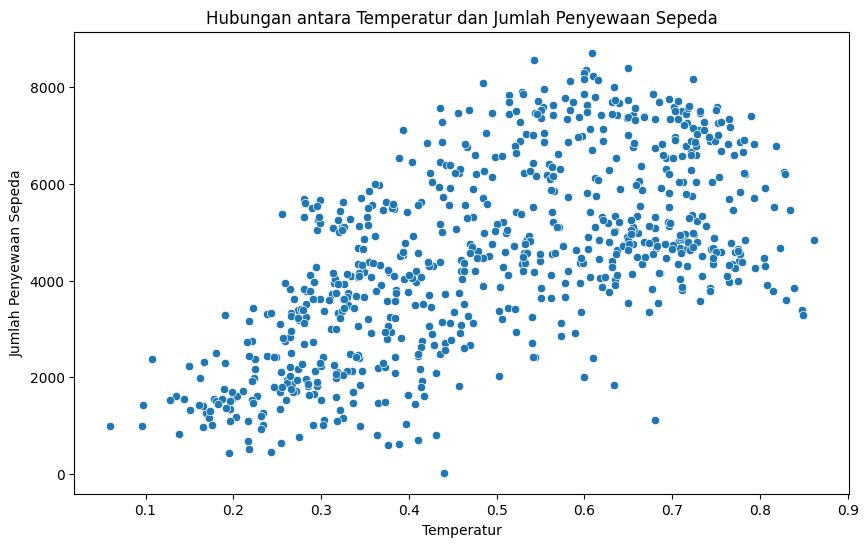

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temperatur', y='user_total')
plt.title('Hubungan antara Temperatur dan Jumlah Penyewaan Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


Analisis Korelasi

In [242]:
correlation_temp_rentals = day_df['temperatur'].corr(day_df['user_total'])
print(f'Korelasi antara Temperatur dan Jumlah Penyewaan: {correlation_temp_rentals}')


Korelasi antara Temperatur dan Jumlah Penyewaan: 0.6274940090334918


Regresi Linear

In [243]:
import statsmodels.api as sm


X = day_df['temperatur']
y = day_df['user_total']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             user_total   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.81e-81
Time:                        04:14:35   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537      0.0

### Pertanyaan 2: Apa dampak variasi musiman terhadap jumlah penyewaan sepeda harian?

Visualisasi Jumlah Penyewaan per Musim

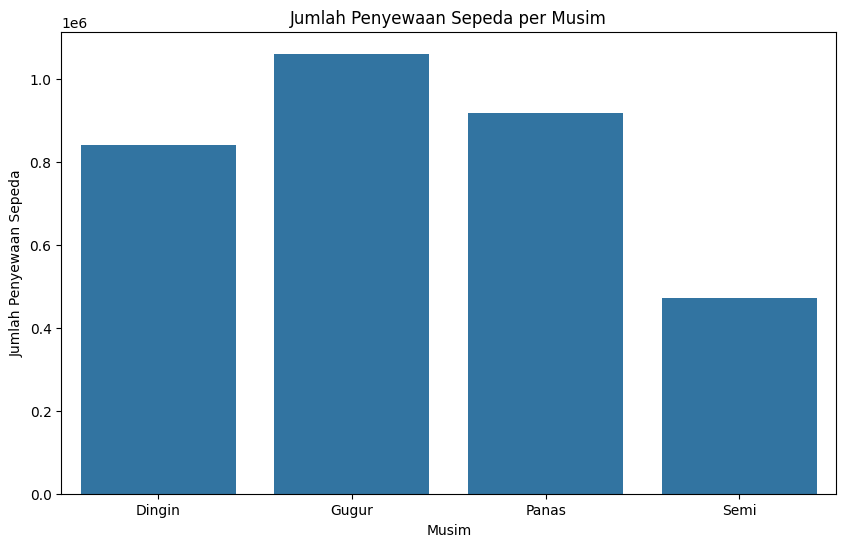

In [244]:
seasonal_rentals = day_df.groupby('musim')['user_total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_rentals, x='musim', y='user_total')
plt.title('Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


Analisis Varians (ANOVA)

In [245]:
groups = [group['user_total'].values for name, group in day_df.groupby('musim')]

f_statistic, p_value = stats.f_oneway(*groups)
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

F-statistic: 128.76962156570784, p-value: 6.720391362913176e-67


**Insight:**



*   Korelasi Temperatur dan Penyewaan:
Analisis menunjukkan bahwa terdapat korelasi positif yang signifikan antara temperatur dan jumlah penyewaan sepeda, dengan nilai korelasi sebesar 0.63. Ini menunjukkan bahwa peningkatan temperatur cenderung diikuti dengan peningkatan jumlah penyewaan sepeda.

*   Regresi Linier:
Hasil regresi linier menunjukkan bahwa setiap kenaikan 1 unit temperatur berhubungan dengan peningkatan sebesar 6640 penyewaan sepeda.
Model ini memiliki nilai R-squared sebesar 0.394, yang berarti bahwa sekitar 39.4% variasi dalam jumlah penyewaan dapat dijelaskan oleh temperatur.
P-value yang sangat rendah (p < 0.0001) menunjukkan bahwa hubungan antara temperatur dan jumlah penyewaan sangat signifikan.

*   Jumlah Penyewaan per Musim:
Visualisasi menunjukkan jumlah penyewaan berdasarkan musim:
Musim Dingin: 0.8
Musim Gugur: 1.1
Musim Panas: 0.9
Musim Semi: 0.5
Data ini menunjukkan bahwa musim gugur memiliki jumlah penyewaan tertinggi yakni sebesar 1.100.000 orang, diikuti oleh musim panas dan musim dingin, sementara musim semi menunjukkan jumlah penyewaan terendah.

*   Analisis Varians (ANOVA):
Hasil ANOVA menunjukkan F-statistic: 128.77 dengan p-value yang sangat rendah (p < 0.0001). Ini mengindikasikan bahwa terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda antara musim yang berbeda.
Dengan kata lain, variasi musiman secara signifikan mempengaruhi jumlah penyewaan sepeda, sehingga strategi pemasaran atau pengelolaan layanan penyewaan dapat diadaptasi sesuai dengan musim untuk memaksimalkan penyewaan.

## Conclusion

- Conclution pertanyaan 1 : Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda Analisis menunjukkan adanya hubungan positif yang kuat antara temperatur dan jumlah penyewaan sepeda dengan nilai korelasi sebesar 0.63. Hasil regresi linear mengungkapkan bahwa untuk setiap kenaikan satu unit suhu, jumlah penyewaan sepeda meningkat rata-rata sekitar 6640 unit, dengan R-squared sebesar 0.39. Ini berarti sekitar 39% variasi dalam jumlah penyewaan dapat dijelaskan oleh perubahan suhu, menunjukkan bahwa suhu memiliki pengaruh signifikan terhadap aktivitas penyewaan sepeda.

- Conclution pertanyaan 2 : Dampak Variasi Musiman terhadap Jumlah Penyewaan Sepeda Hasil analisis varians (ANOVA) menunjukkan perbedaan yang signifikan dalam jumlah penyewaan sepeda antar musim, dengan F-statistic sebesar 128.77 dan p-value yang sangat rendah (< 0.001). Data visualisasi menunjukkan bahwa jumlah penyewaan tertinggi terjadi pada musim dingin dan panas, sedangkan musim semi mencatatkan angka terendah. Ini menandakan bahwa pola penyewaan sepeda sangat dipengaruhi oleh variasi musiman.

**Saran**


1.   Melakukan Penyesuaian Strategi Pemasaran: Mengingat adanya hubungan positif antara temperatur dan jumlah penyewaan, perusahaan dapat memanfaatkan informasi ini dengan mengembangkan promosi yang menarik pada hari-hari dengan temperatur tinggi untuk mendorong lebih banyak penyewaan
2.  Mengembangan Produk Musiman: Dengan variasi jumlah penyewaan berdasarkan musim, penting bagi perusahaan untuk mengembangkan produk atau paket layanan yang sesuai dengan masing-masing musim. Misalnya, menambah layanan sewa sepeda khusus untuk kegiatan luar ruangan pada musim panas.
3.  Melaksanakan Pemantauan Data Cuaca: Memanfaatkan data cuaca untuk memprediksi tren penyewaan dan menyesuaikan stok sepeda serta ketersediaan layanan di waktu-waktu yang diperkirakan akan mengalami lonjakan permintaan.



In [247]:
day_df.to_csv('main_data.csv', index=False)

from google.colab import files
files.download('main_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>